In [1]:
import numpy as np
import functools
import math
import pygal
import time
import sys

In [2]:
# Fibonacci with 3 implementation, brute-force, dynamic programming, matrix 

In [3]:
# Tranditional recursive approach
def fibonacci_brute_force(n):
    if n == 0 or n == 1:
        return n
    else:
        return fibonacci_brute_force(n - 1) + fibonacci_brute_force(n - 2)

In [4]:
# With memorize
def fibonacci_memorize(n, dict_ = None):
    if dict_ == None:
        dict_ = {}
    if n == 0 or n == 1:
        return n
    if n in dict_:
        return dict_[n]
    else:
        ans = fibonacci_memorize(n - 1, dict_) + fibonacci_memorize(n - 2, dict_)
        dict_[n] = ans
        return ans

In [5]:
# Fibonacci Q-Matrix is Q = [F2 F1]
#                           [F1 F0], which can use multiplication to reduce complexity
def fibonacci_matrix(n):
    if n == 0:
        return (0, 1)
    else:
        a, b = fibonacci_matrix(n // 2)
        c = a * (b * 2 - a)
        d = a**2 + b**2
        if n % 2 == 0:
            return (c, d)
        else:
            return (d, c + d)

In [6]:
def perf(function):
    start = time.perf_counter()
    function()
    end = time.perf_counter()
    return end - start

In [7]:
# compare this 3 approach

In [8]:
ana_data = {}
ana_data['brute_force'] = []
ana_data['memorize'] = []
ana_data['matrix'] = []
small_scale = 33
bigger_scale = 200
sys.setrecursionlimit(20000)

In [9]:
for i in range(bigger_scale):
    if i < small_scale:
        ana_data['brute_force'].append(perf(functools.partial(fibonacci_brute_force, i)))
    ana_data['memorize'].append(perf(functools.partial(fibonacci_memorize, i)))
    ana_data['matrix'].append(perf(functools.partial(fibonacci_matrix, i)))

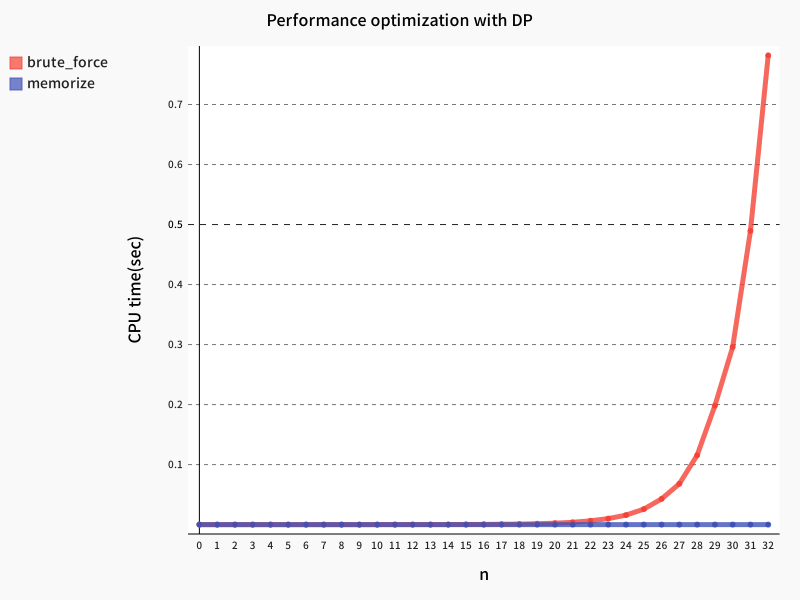

In [10]:
fibonacci_chart = pygal.Line(stroke_style={'width': 5})
fibonacci_chart.title = 'Performance optimization with DP'
fibonacci_chart.y_title = 'CPU time(sec)'
fibonacci_chart.x_title = 'n'
fibonacci_chart.x_labels = map(str, range(small_scale))
fibonacci_chart.add('brute_force', ana_data['brute_force'])
fibonacci_chart.add('memorize', ana_data['memorize'][:small_scale])    
fibonacci_chart

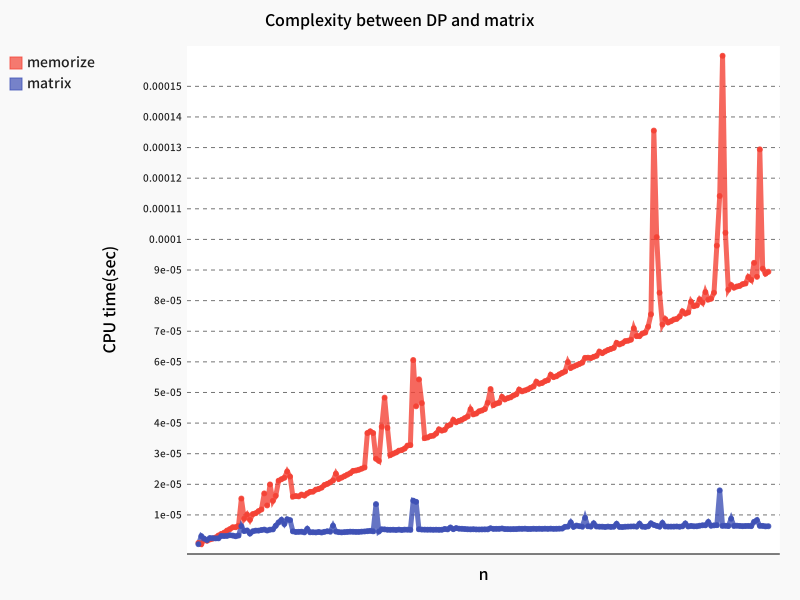

In [11]:
fibonacci_chart = pygal.Line(stroke_style={'width': 5})
fibonacci_chart.title = 'Complexity between DP and matrix'
fibonacci_chart.y_title = 'CPU time(sec)'
fibonacci_chart.x_title = 'n'
fibonacci_chart.add('memorize', ana_data['memorize'][:bigger_scale])
fibonacci_chart.add('matrix', ana_data['matrix'][:bigger_scale])    
fibonacci_chart

In [12]:
# Longest Common Subsequence
# The concept is mostly same as fibonacci, will not show the time comparison
def lcs(x, y):
    row = len(x) + 1
    col = len(y) + 1
    
    dp = np.zeros((row, col), dtype=int)
    for r in range(1, row):
        for c in range(1, col):
            if x[r - 1] == y[c - 1]: # if two pointed value is same, ans += 1
                dp[r, c] = dp[r - 1, c - 1] + 1
            else: # if two pointed different value, get max value of move two pointer front
                dp[r, c] = max(dp[r - 1, c], dp[r, c - 1])
    return dp.max() # last element

testx = 'memorize'
testy = 'matrix'

print(lcs(testx, testy))

3


In [36]:
# Text justification
# The principle of TJ is that let the sum of (width - spend)**2 minium

text = """I see Barsad, and Cly, Defarge, The Vengeance [a lieutenant of Madame Defarge], the Juryman, the Judge, long ranks of the new oppressors who have risen on the destruction of the old, perishing by this retributive instrument, before it shall cease out of its present use. I see a beautiful city and a brilliant people rising from this abyss, and, in their struggles to be truly free, in their triumphs and defeats, through long years to come, I see the evil of this time and of the previous time of which this is the natural birth, gradually making expiation for itself and wearing out. I see the lives for which I lay down my life, peaceful, useful, prosperous and happy, in that England which I shall see no more. I see Her with a child upon her bosom, who bears my name. I see her father, aged and bent, but otherwise restored, and faithful to all men in his healing office, and at peace. I see the good old man [Mr. Lorry], so long their friend, in ten years' time enriching them with all he has, and passing tranquilly to his reward. I see that I hold a sanctuary in their hearts, and in the hearts of their descendants, generations hence. I see her, an old woman, weeping for me on the anniversary of this day. I see her and her husband, their course done, lying side by side in their last earthly bed, and I know that each was not more honoured and held sacred in the other's soul, than I was in the souls of both. I see that child who lay upon her bosom and who bore my name, a man winning his way up in that path of life which once was mine. I see him winning it so well, that my name is made illustrious there by the light of his. I see the blots I threw upon it, faded away. I see him, fore-most of just judges and honoured men, bringing a boy of my name, with a forehead that I know and golden hair, to this place—then fair to look upon, with not a trace of this day's disfigurement—and I hear him tell the child my story, with a tender and a faltering voice. It is a far, far better thing that I do, than I have ever done; it is a far, far better rest that I go to than I have ever known."""

def text_justification(text, width):
    word_list = text.split()
    length = len(text.split())
    cost_table = np.zeros((length, length), dtype=int)
    MAX = width ** 4 # A big value
    
    for i in range(length):
        cost_table[i][i] = width - len(word_list[i])
        for j in range(i + 1, length):
            cost_table[i][j] = cost_table[i][j - 1] - len(word_list[j]) - 1 # include space
            
    for i in range(length):
        for j in range(i, length):
            if cost_table[i][j] < 0:
                cost_table[i][j] = MAX
            else:
                cost_table[i][j] = cost_table[i][j] ** 2 # square is that double the penalty of space waste
                
    min_cost = np.zeros((length), dtype=int)
    result = np.zeros((length), dtype=int)
    
    # dynamic program using the table create above
    for i in range(length-1, -1, -1):
        min_cost[i] = cost_table[i][length - 1]
        result[i] = length
        for j in range(length-1, i , -1):
            if cost_table[i][j-1] == MAX:
                continue
            if min_cost[i] > min_cost[j] + cost_table[i][j-1]:
                min_cost[i] = min_cost[j] + cost_table[i][j-1]
                result[i] = j
    
    i = 0
    output = []
    
    # Sort out the original text
    while True:
        j = result[i]
        line = ""
        for k in range(i, j):
            line = line + word_list[k] + " "
        output.append(line)
        i = j
        if j >= length:
            break

    return output
    
out = text_justification(text, 80)
out

['I see Barsad, and Cly, Defarge, The Vengeance [a lieutenant of Madame Defarge], ',
 'the Juryman, the Judge, long ranks of the new oppressors who have risen on ',
 'the destruction of the old, perishing by this retributive instrument, before ',
 'it shall cease out of its present use. I see a beautiful city and a brilliant ',
 'people rising from this abyss, and, in their struggles to be truly free, in ',
 'their triumphs and defeats, through long years to come, I see the evil of this ',
 'time and of the previous time of which this is the natural birth, gradually ',
 'making expiation for itself and wearing out. I see the lives for which I lay ',
 'down my life, peaceful, useful, prosperous and happy, in that England which I ',
 'shall see no more. I see Her with a child upon her bosom, who bears my name. ',
 'I see her father, aged and bent, but otherwise restored, and faithful to all ',
 'men in his healing office, and at peace. I see the good old man [Mr. Lorry], ',
 "so long the